# Python Dependencies

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd

from ipywidgets import interact
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [6, 6]

# Constants

### $r_0$ = contagiousness ratio
## $P$ = total population
### $T$ = period of infectiousness in days

# Functions

### $G(t) =$ the number of "sick" or "gestating" people in the population
### $R(t) =$ the number of "recovered" and dead people - i.e. those who were previously infected and are no longer contagious

# Difference Equations

## $\frac{dR}{dt} = \frac{r_0G(t)}{T}\left(1-\frac{R(t)}{P}\right)$
## $G(t) = R(t) - R(t-T)$

# Integral Class

In [2]:
class Integral:
    def __init__(self, func, initial_condition=0):
        self.func = func
        self.initial_condition = initial_condition
        self.lookup = {}
        
    def apply(self, t):
        if t <= 0:
            return self.initial_condition
        if t not in self.lookup:
            self.lookup[t] = self.apply(t-1) + self.func(t)
        
        return self.lookup[t]

# R

In [3]:
class DerivR:
    def __init__(self, r0, T, P):
        self._lookup = {}
        self.R = Integral(self.apply).apply
        self.G = lambda t: self.R(t) - self.R(t-T)
        self.r0, self.T, self.P = r0, T, P
        
    def lookup(self, t):
        """
        Lookup previously calculated
        """
        if t <= 1:
            return self.r0/self.T
        return self._lookup[t]
        
    def apply(self, t):
        if t not in self._lookup:
            self._lookup[t] = (self.r0/self.T)*(self.R(t-1) - self.R(t-self.T-1))*(1-self.R(t-1)/self.P)

        return self.lookup(t)

# Plotting Functions

In [4]:
def plot_infection(r0, T, P, num_days):
    deriv = DerivR(r0, T, P)
    domain = np.linspace(0, num_days-1, num_days)
    r = {x: deriv.R(x) for x in domain}
    g = {x: deriv.G(x) for x in domain}
    df = pd.DataFrame(data={"Currently or Previously Infected": r, "Currently Infected": g})
    return df.plot.line()

In [5]:
def plot_infection_scenarios(r0s, T, P, num_days):
    data = {}
    for r0 in r0s:
        deriv = DerivR(r0, T, P)
        domain = np.linspace(0, num_days-1, num_days)
        r = {x: deriv.R(x) for x in domain}
        g = {x: deriv.G(x) for x in domain}
        data[f"Previously Infected R_0={r0}"] = r
        data[f"Infected R_0={r0}"] = g
    df = pd.DataFrame(data=data)
    return df.plot.line()

In [6]:
def infection_slider(num_days=365, T=6.0, P=8_000_000, init_r0=1.3):
    domain = np.linspace(0, num_days-1, num_days)
    fig = plt.figure()
    fig.suptitle("Corona Virus Simulation")

    ax = fig.add_subplot(1, 1, 1)
    deriv = DerivR(3*init_r0, T, P)
    r, = ax.plot(domain, np.array([deriv.R(x) for x in domain]))
    g, = ax.plot(domain, np.array([deriv.G(x) for x in domain]))

    def update(r0=init_r0):
        deriv = DerivR(r0, T, P)
        r.set_ydata(np.array([deriv.R(x) for x in domain]))
        g.set_ydata(np.array([deriv.G(x) for x in domain]))
        fig.canvas.draw_idle()

    return interact(update)

# Plot 3 Different Values of $R_0$

<IPython.core.display.Javascript object>


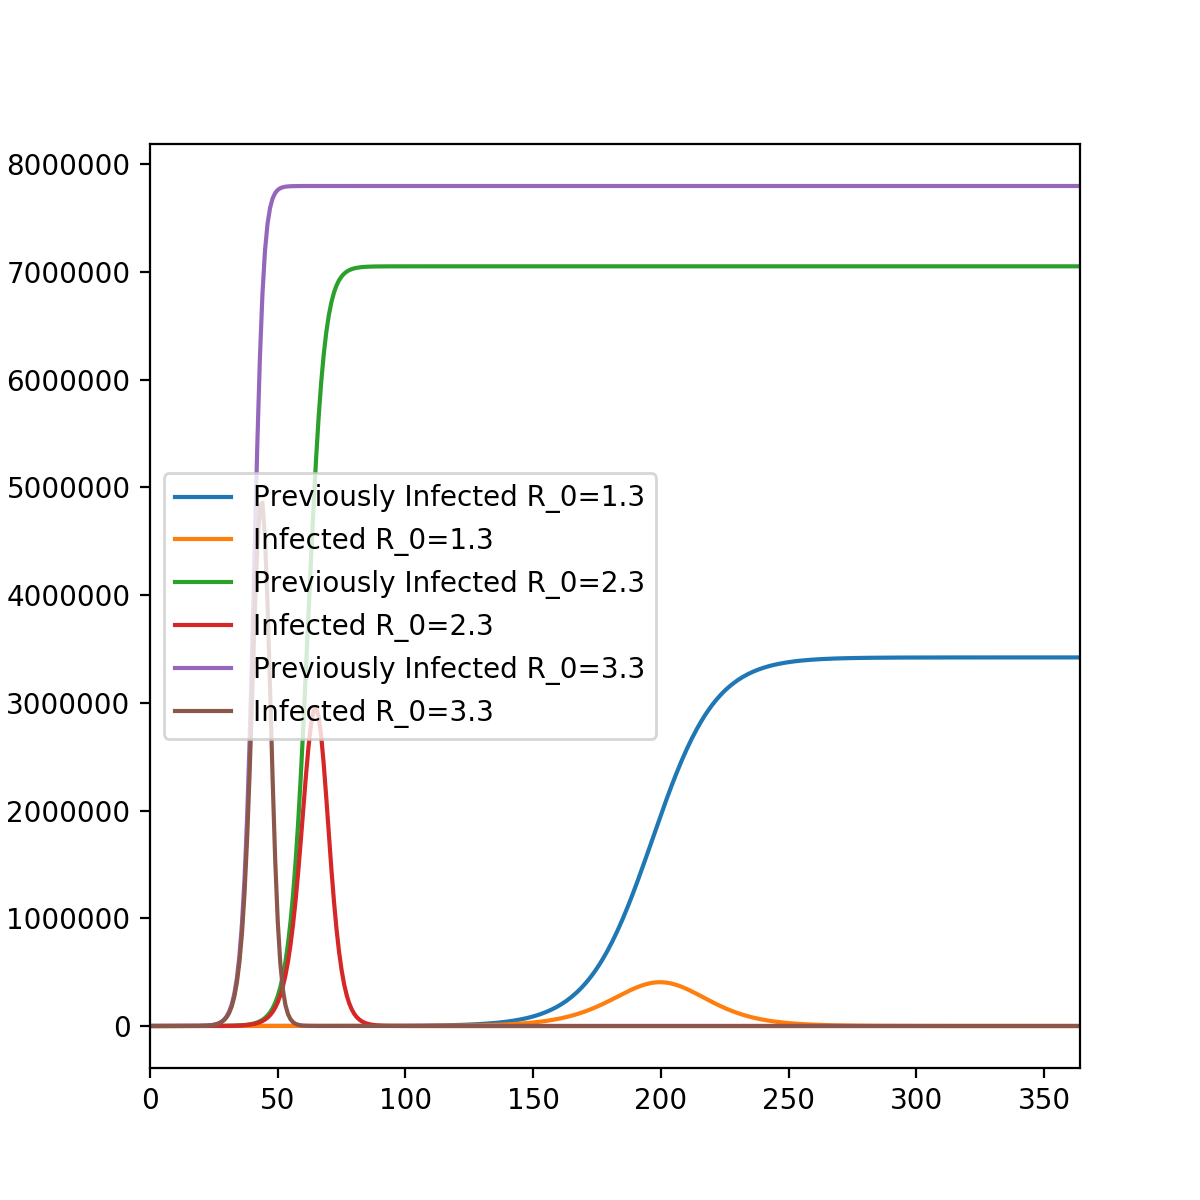

In [7]:
plot_infection_scenarios(np.linspace(1.3, 3.3, 3), 6, 8_000_000, 365)

# Simulate with an $R_0$ Slider

<IPython.core.display.Javascript object>


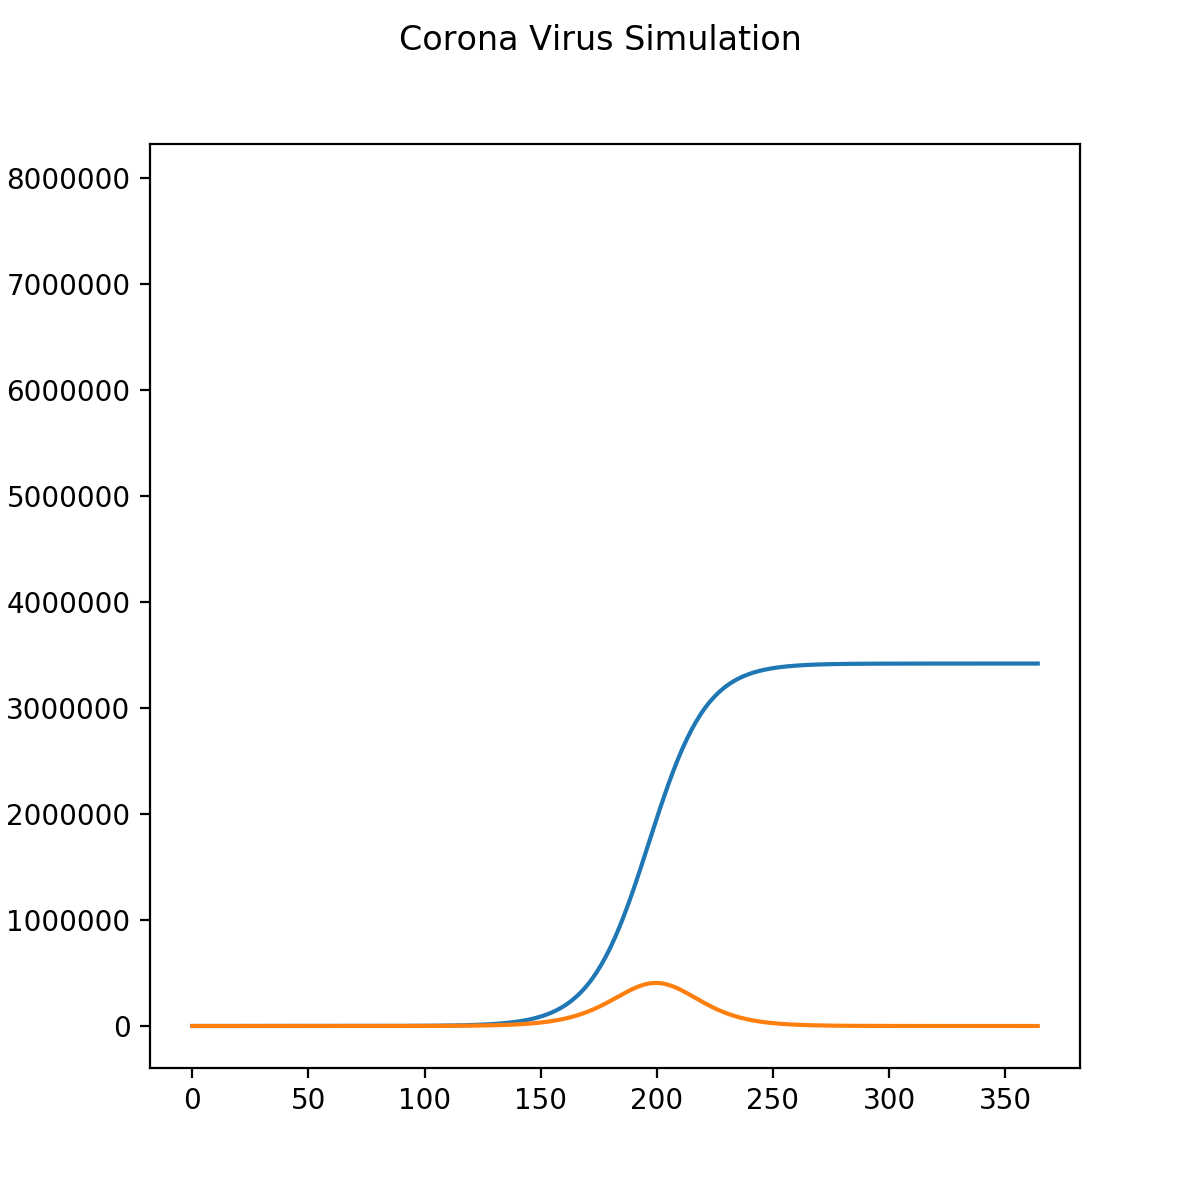

interactive(children=(FloatSlider(value=1.3, description='r0', max=3.9000000000000004, min=-1.3), Output()), _…

<function __main__.infection_slider.<locals>.update(r0=1.3)>

In [8]:
infection_slider()